In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle 
import zipfile
tf.__version__

'2.16.1'

In [2]:
with open('C:/Users/José Adauto/Documents/datasets/traffic-signs-data/traffic-signs-data/train.p', mode='rb') as training_data:
    train = pickle.load(training_data)
with open('C:/Users/José Adauto/Documents/datasets/traffic-signs-data/traffic-signs-data/test.p', mode='rb') as test_data:
    test = pickle.load(test_data)
with open('C:/Users/José Adauto/Documents/datasets/traffic-signs-data/traffic-signs-data/valid.p', mode='rb') as validation_data:
    validation = pickle.load(validation_data)
    

In [3]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [4]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_validation, y_validation = validation['features'], validation['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
X_test.shape

(12630, 32, 32, 3)

In [7]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [8]:
X_train_gray = np.sum(X_train / 3, axis = 3, keepdims=True)
X_test_gray = np.sum(X_test / 3, axis = 3, keepdims=True)
X_validation_gray = np.sum(X_validation / 3, axis = 3, keepdims=True)


In [9]:
X_train_gray.shape

(34799, 32, 32, 1)

In [10]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

In [11]:
np.max(X_train_gray_norm)

0.9921875

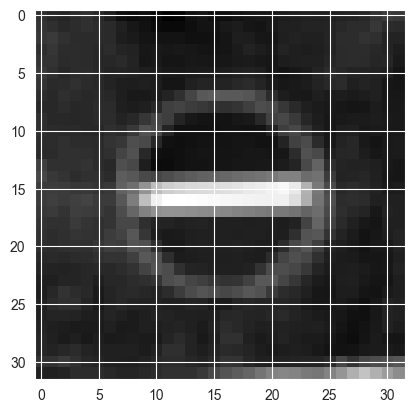

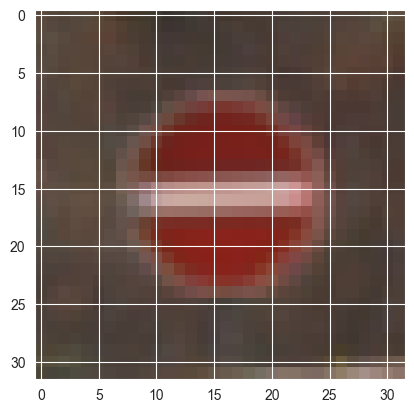

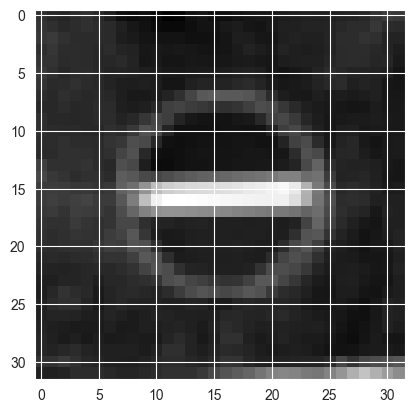

In [12]:
i = 510
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray') 
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')

In [16]:
from tensorflow.keras import layers, models
LeNet = models.Sequential() 

LeNet.add(layers.Conv2D(6, (5,5), activation='relu', input_shape=(32,32,1)))
LeNet.add(layers.AveragePooling2D(pool_size=(2,2)))
LeNet.add(layers.Conv2D(16, (5,5), activation='relu'))
LeNet.add(layers.AveragePooling2D(pool_size=(2,2)))
LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation='relu'))
LeNet.add(layers.Dense(84, activation='relu'))
LeNet.add(layers.Dense(43, activation='softmax'))
LeNet.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 43)             │         3,655 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,511 (252.00 KB)

 Trainable params: 64,511 (252.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
LeNet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = LeNet.fit(X_train_gray_norm, y_train, batch_size=500, epochs=50, validation_data=(X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.1068 - loss: 3.4927 - val_accuracy: 0.2395 - val_loss: 2.8760
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4202 - loss: 2.1638 - val_accuracy: 0.5512 - val_loss: 1.5784
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6612 - loss: 1.1659 - val_accuracy: 0.6662 - val_loss: 1.1528
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7727 - loss: 0.7892 - val_accuracy: 0.7206 - val_loss: 0.9556
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8272 - loss: 0.6168 - val_accuracy: 0.7571 - val_loss: 0.8435
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8646 - loss: 0.4916 - val_accuracy: 0.7587 - val_loss: 0.8107
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8813 - loss: 0.4303 - val_accuracy: 0.7932 - val_loss: 0.7392
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9023 - loss: 0.3699 - val_accuracy: 0.7884 - v

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


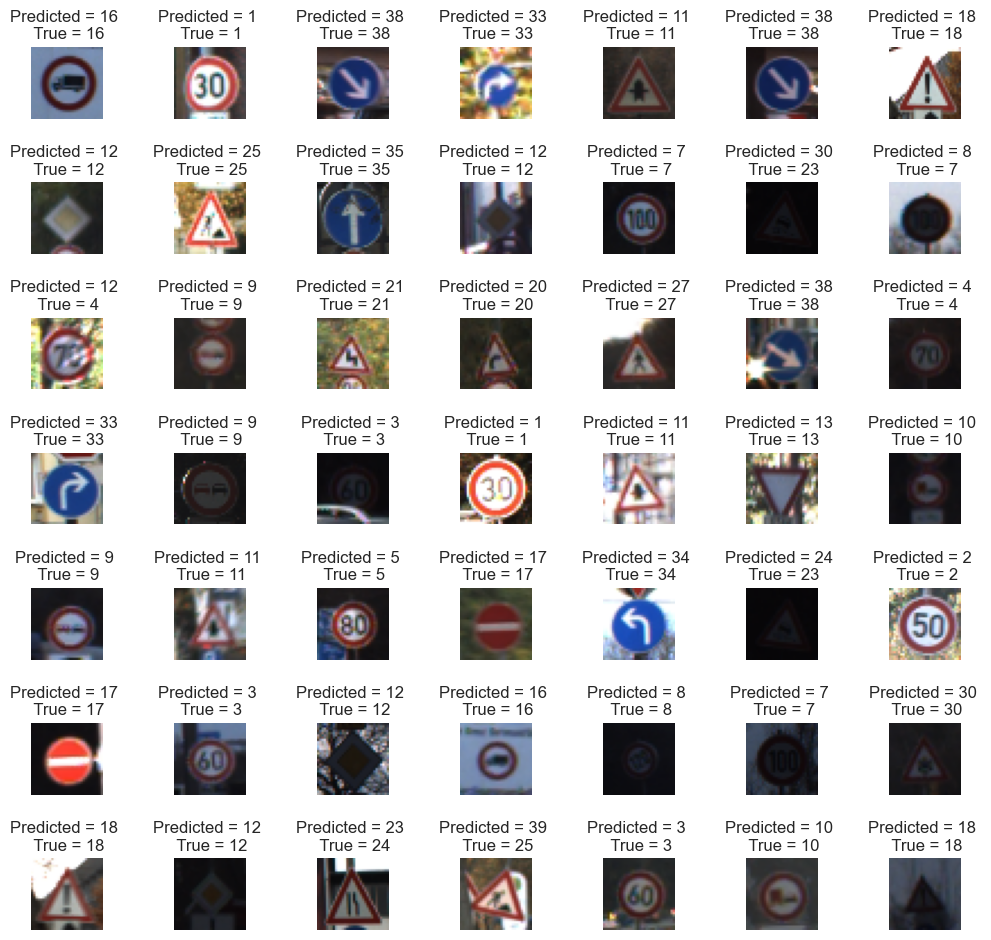

In [23]:
predicted_classes = np.argmax(LeNet.predict(X_test_gray_norm), axis=-1)
y_true = y_test
fig, axes = plt.subplots(7,7, figsize=(12, 12))
axes = axes.ravel()

for i in range(0, 7*7):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Predicted = {} \n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)